# <b>Stock Market Analysis and Predictions 


Import Libraries

In [41]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
# for visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
# To remove import errors of pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like

In [42]:
#for time stamps
from datetime import datetime
#for reading stock data from IEX
import yfinance as yf


In [43]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#setting up Start and End times for data
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For-loop for grabing iex finance data and setting as a dataframe

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    #globals is to make the values as global values/ something like to keep(copy) them permanent in dataframe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


in iex apple is coded as AAPL so we need to code it in 'AAPL'

In [44]:
company_list = [AAPL,GOOG,MSFT,AMZN]
company_name = ["Apple","google","microsoft","amazon"]
for company,company_name1 in zip(company_list,company_name):
    company["company_name"] = company_name1
# zip is to combine or add company name to company list
#AAPL GOOG etc in company list are stock files not just name, for better understanding use the code below
# it is same as writing AAPL["company_name"]= "Apple"
#print(company_list)    

In [45]:
df = pd.concat(company_list,axis=0)
#concating all company list in a single data frame

#replace AAPL with GOOG MSFT AMZN in the below

In [46]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-21,175.070007,176.130005,173.740005,175.839996,174.944794,46311900,Apple
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.327713,42084200,Apple
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.197906,52722800,Apple
2023-08-24,180.669998,181.100006,176.009995,176.380005,175.482056,54945800,Apple
2023-08-25,177.380005,179.149994,175.820007,178.610001,177.700684,51449600,Apple


In [47]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,188.554560,190.341440,186.976520,188.752800,188.196729,6.041835e+07
std,16.945140,17.255532,16.578659,16.956187,17.096503,2.486774e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.322498,177.135002,173.797497,175.552505,174.706821,4.657705e+07
50%,185.380005,186.845001,183.574997,185.574997,184.873466,5.373395e+07
75%,194.404999,195.390003,193.090000,194.245003,193.707447,6.600965e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [48]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-08-21 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [49]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

## Data Visualization


This has nothing much to do with creating model, its only analysis

The analysis part is to compare one company to another, knowing where the return would be high, value to risk, how much the company returns compared to others, etc

Ploting the close values of a company

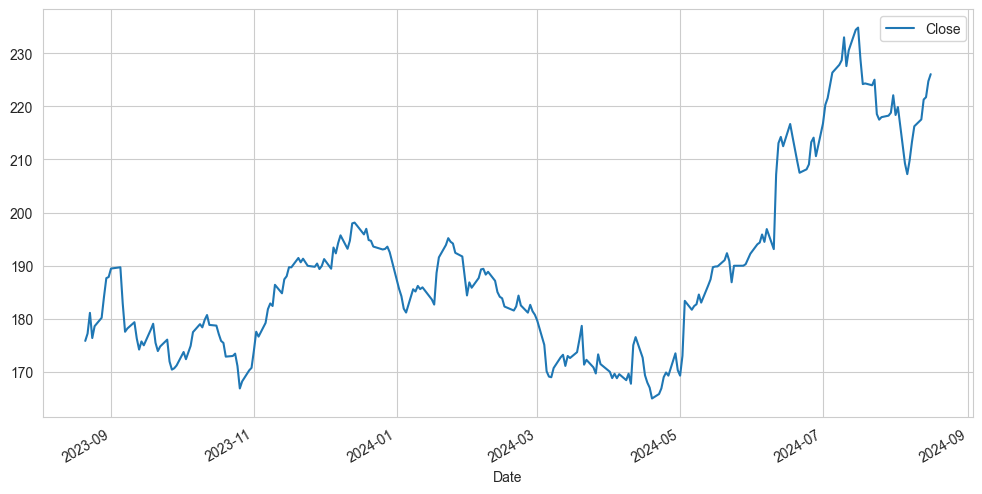

In [50]:
AAPL['Close'].plot(legend = True,figsize = (12,6))
plt.show()

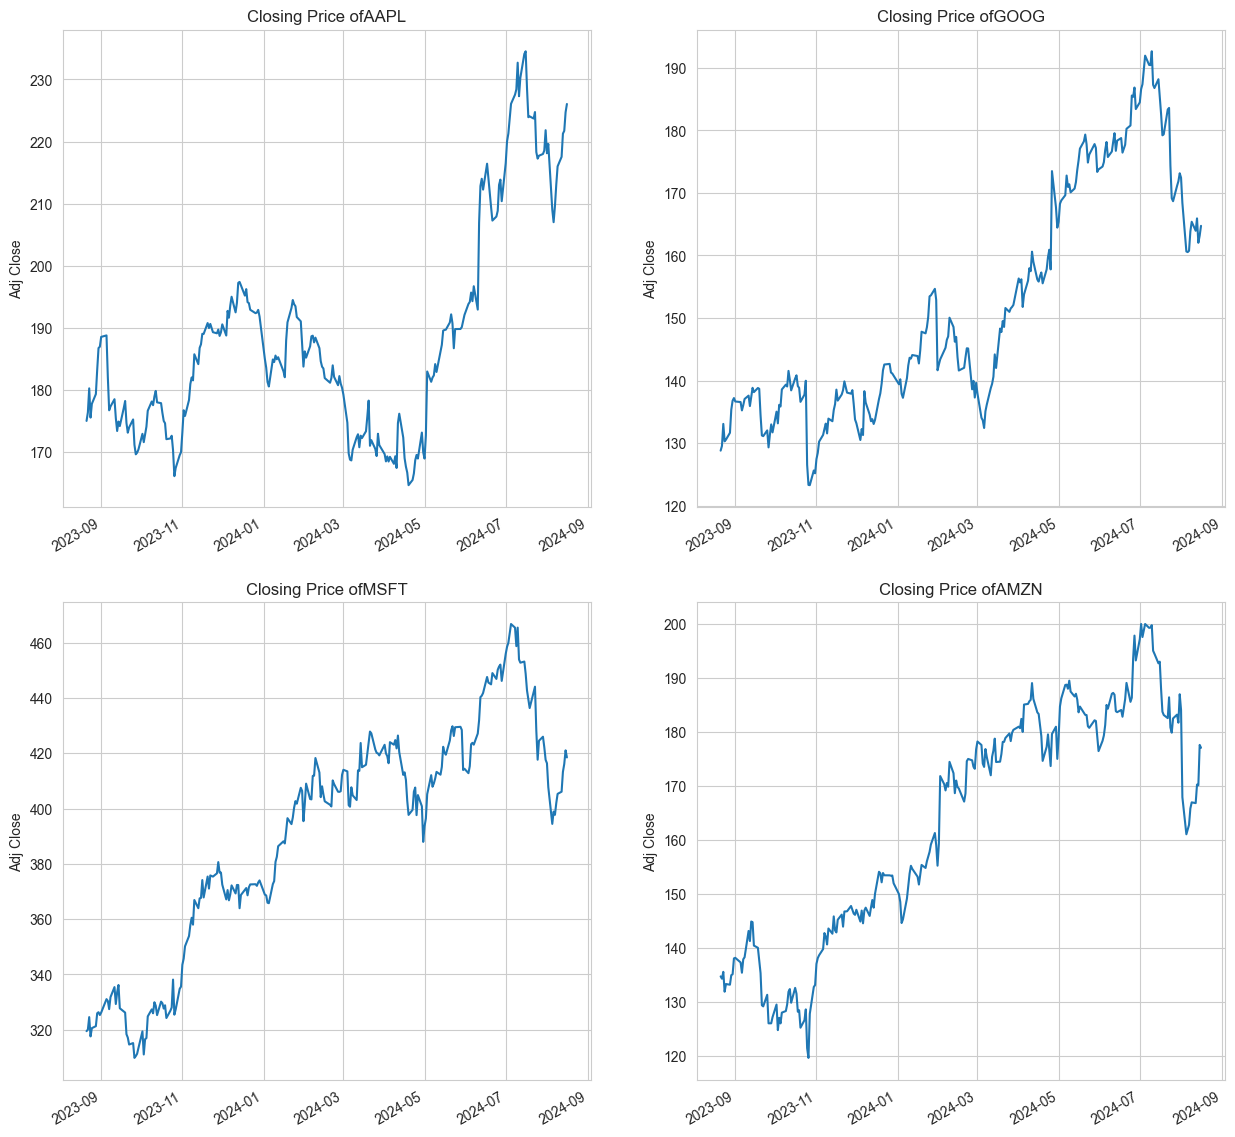

In [51]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom= 1.2)

for i, company in enumerate(company_list,1): #gives: 1 AAPL etc
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of{tech_list[i-1]}") # -1 because we started indexing from 1

Volume of sales

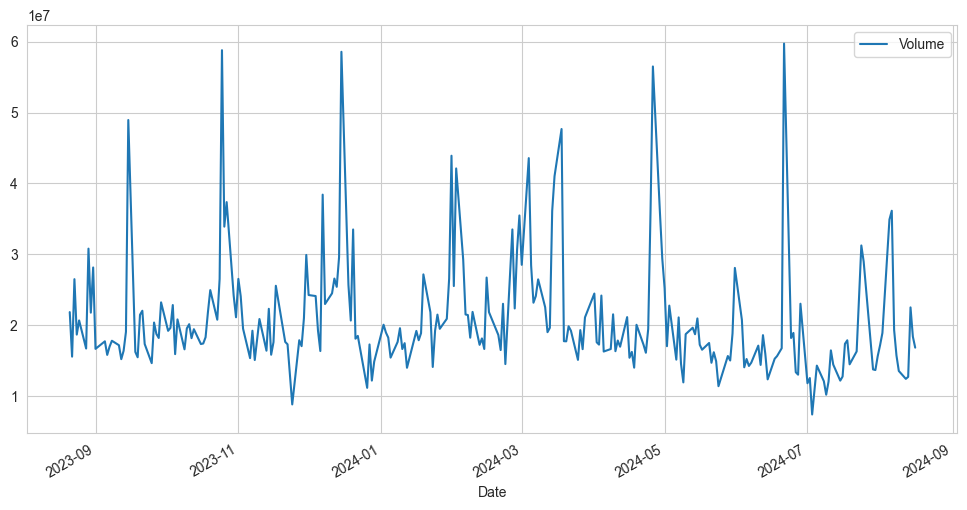

In [52]:
GOOG['Volume'].plot(legend = True,figsize = (12,6))
plt.show()

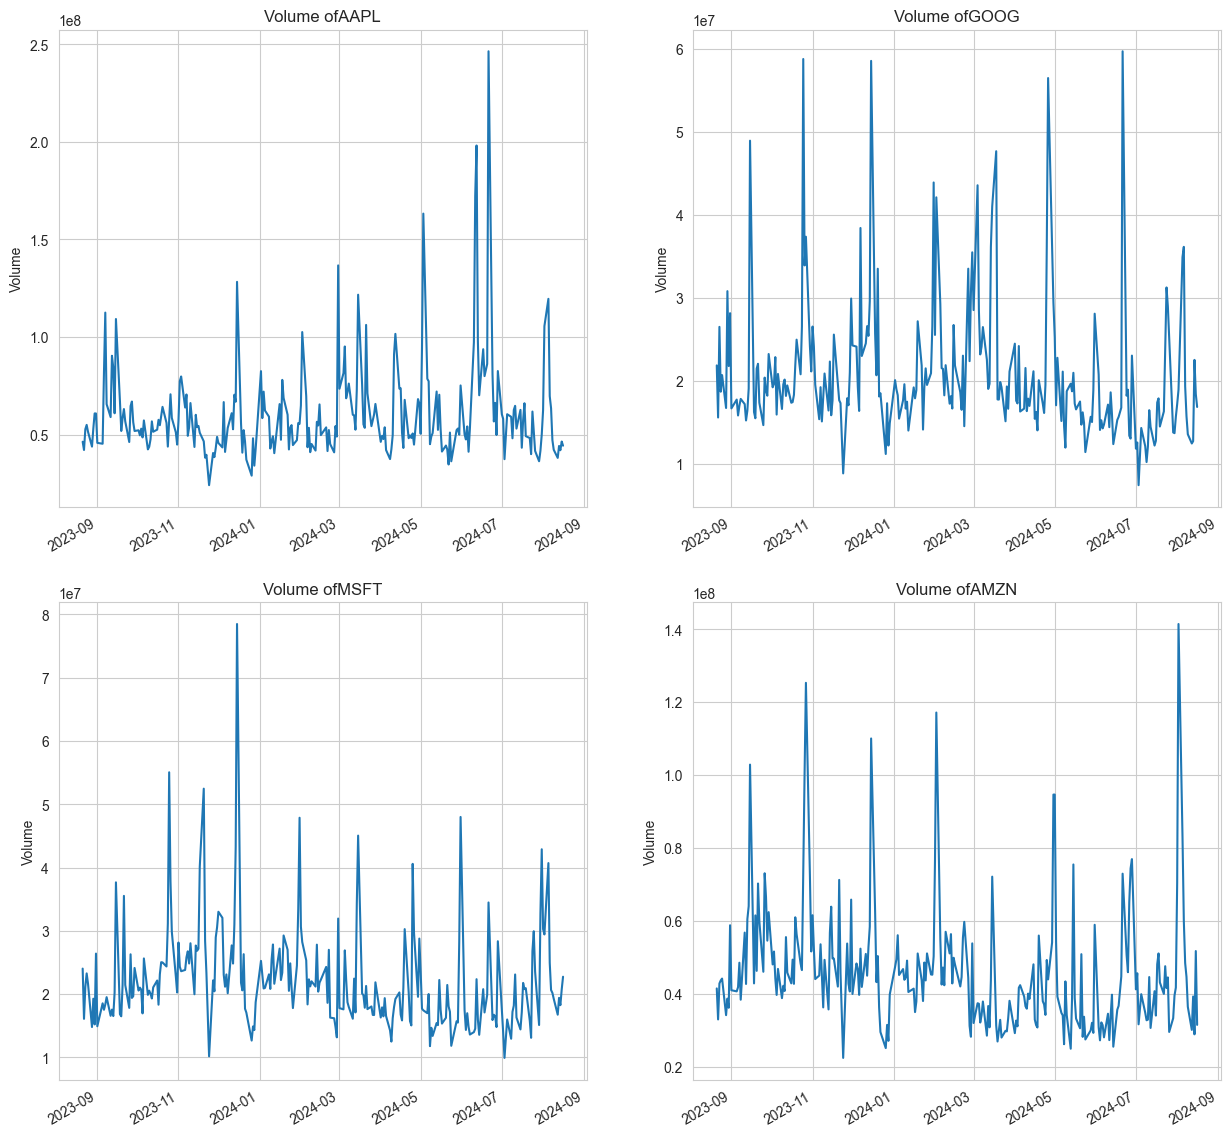

In [53]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom= 1.2)

for i, company in enumerate(company_list,1): #gives: 1 AAPL etc
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of{tech_list[i-1]}")

MOVING AVERAGE

In [54]:
# we will see the moving average for 10 , 20 , 50 days 

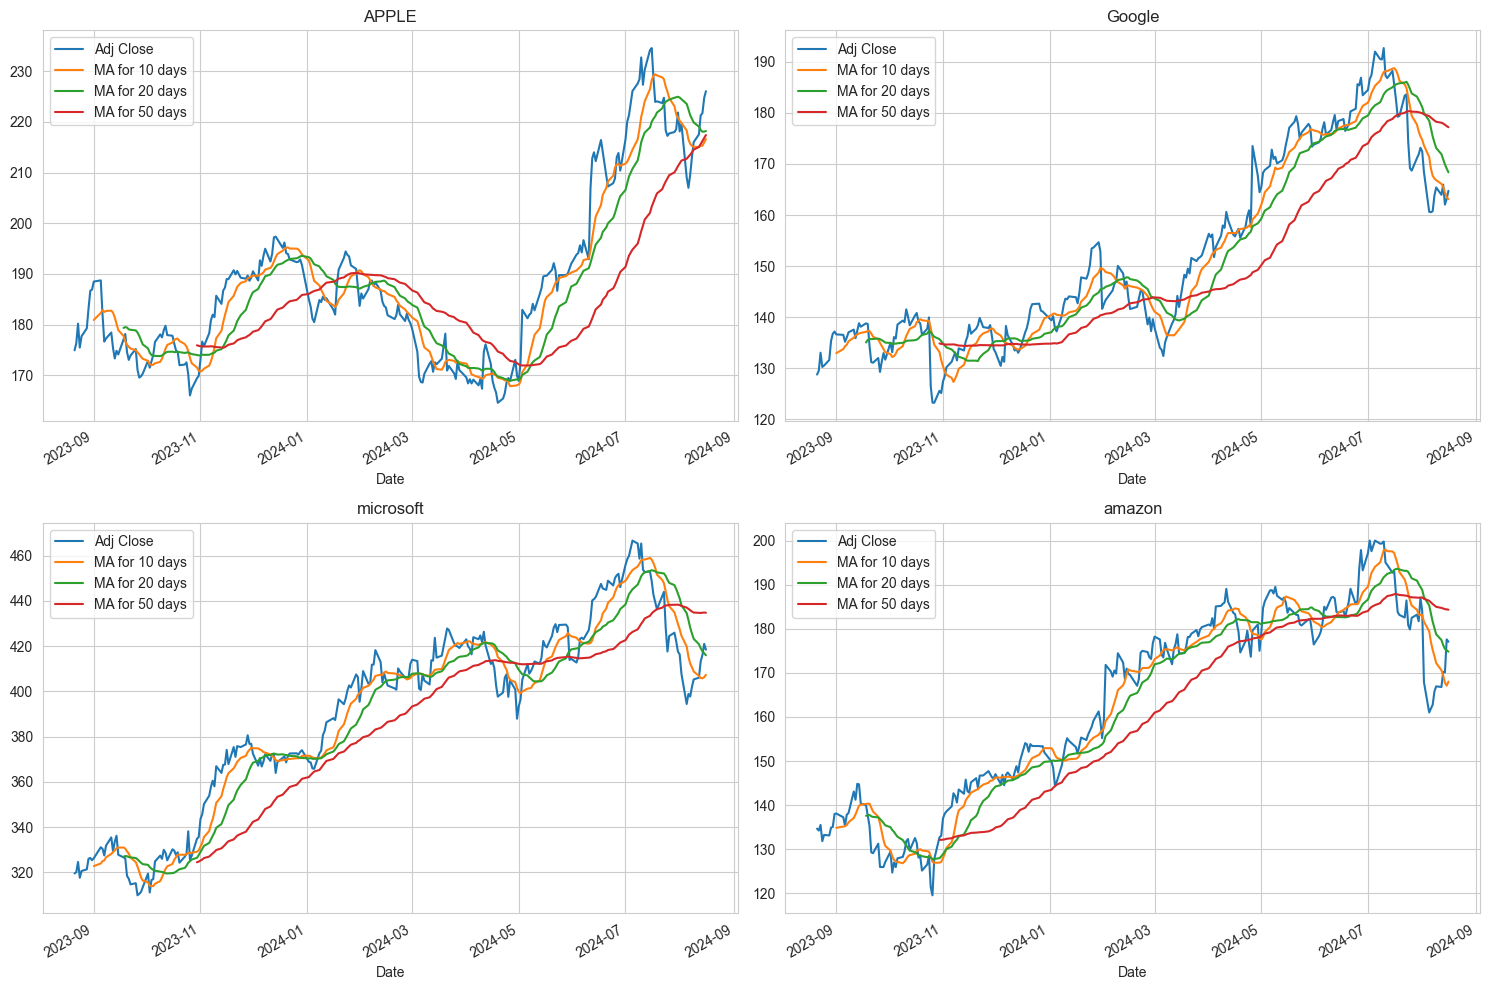

In [55]:
Mavg_day = [10,20,50]


for ma in Mavg_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2,ncols=2)

fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0],)
axes[0,0].set_title ('APPLE')

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title  ('Google')
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title ('microsoft')

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('amazon')

fig.tight_layout()

Text(0.5, 1.0, 'apple')

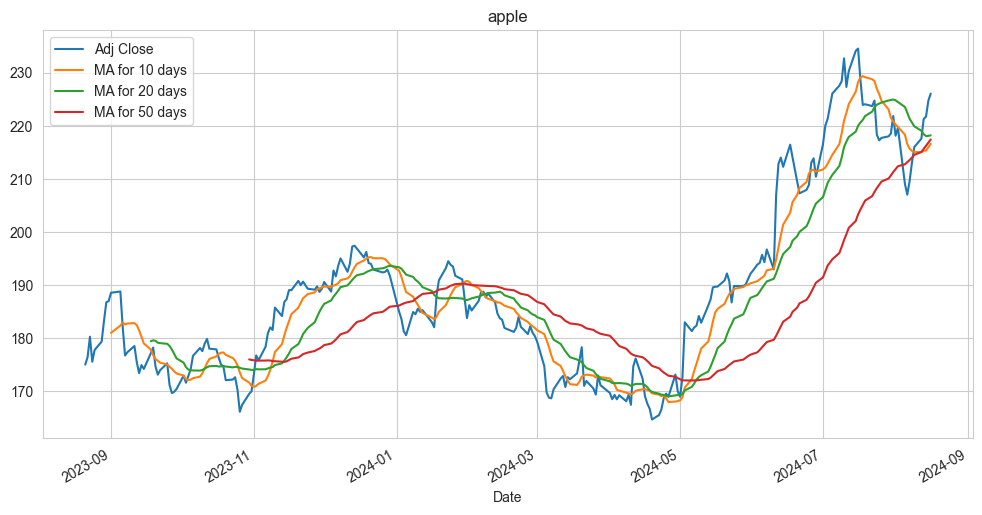

In [56]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(12,6))
plt.title('apple')

Daily return analysis

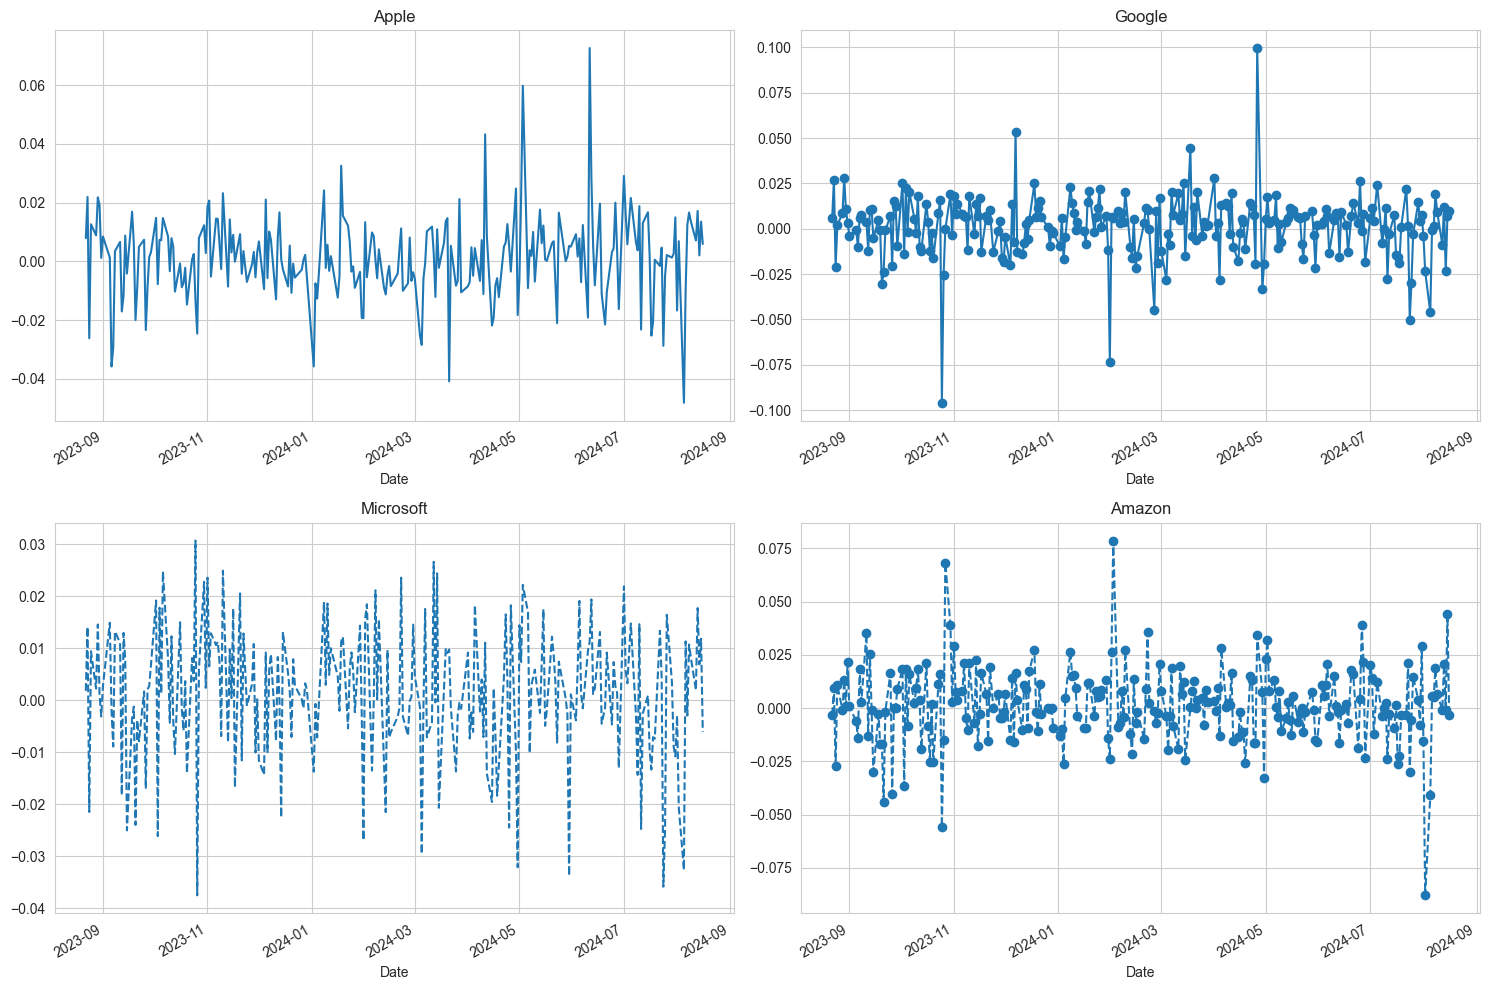

In [57]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    #pct change for percent change for each day
    
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0]) 
axes[0,0].set_title('Apple')
GOOG['Daily Return'].plot(ax=axes[0,1],marker='o') 
axes[0,1].set_title('Google')
MSFT['Daily Return'].plot(ax=axes[1,0],linestyle='--') 
axes[1,0].set_title('Microsoft')
AMZN['Daily Return'].plot(ax=axes[1,1],linestyle='--',marker='o')
axes[1,1].set_title('Amazon')
plt.tight_layout()

0.2, 0.01 etc are close value percent change 

<Axes: xlabel='Date'>

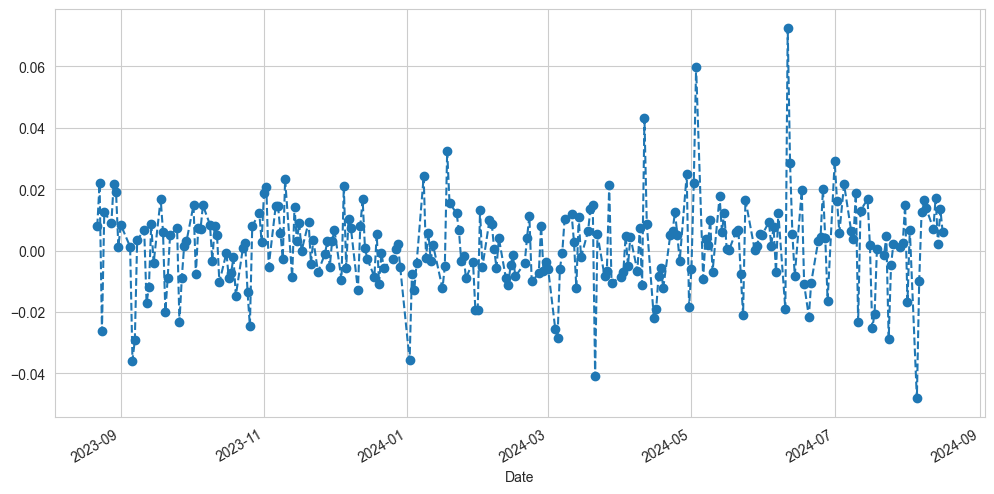

In [58]:
AAPL['Daily Return'].plot(figsize=(12,6),linestyle='--',marker='o')


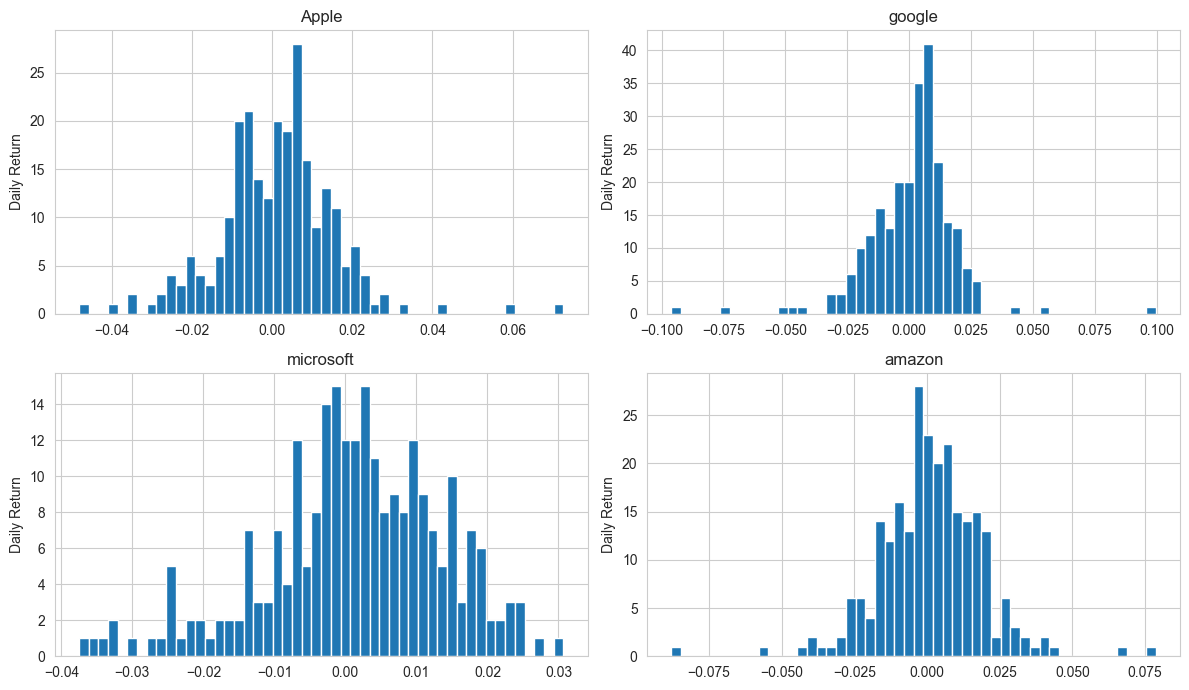

In [59]:
plt.figure(figsize=(12,7)) #plt. should be done before
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()# for best fit

    

pct change vs value of change

correlation between different stocks and closing price 

In [60]:
clossing_df1 = pd.DataFrame(AAPL['Adj Close'])
close1 = clossing_df1.rename(columns={'Adj Close':'apple close'})
clossing_df2 = pd.DataFrame(AMZN['Adj Close'])
close2 = clossing_df2.rename(columns={'Adj Close':'amazon close'})
clossing_df3 = pd.DataFrame(GOOG['Adj Close'])
close3 = clossing_df3.rename(columns={'Adj Close':'google close'})
clossing_df4 = pd.DataFrame(MSFT['Adj Close'])
close4 = clossing_df4.rename(columns={'Adj Close':'microsoft close'})

clossing_df= pd.concat([close1,close4,close3,close2],axis=1)
clossing_df.head()

,apple close,microsoft close,google close,amazon close
Date,,,,
2023-08-21,174.944794,319.481964,128.783447,134.679993
2023-08-22,176.327713,320.057617,129.542587,134.250000
2023-08-23,180.197906,324.563812,133.058594,135.520004
2023-08-24,175.482056,317.586182,130.271759,131.839996
2023-08-25,177.700684,320.573761,130.541458,133.259995


In [61]:
tech_returns = clossing_df.pct_change()
tech_returns.head()

,apple close,microsoft close,google close,amazon close
Date,,,,
2023-08-21,NaN,NaN,NaN,NaN
2023-08-22,0.007905,0.001802,0.005895,-0.003193
2023-08-23,0.021949,0.014079,0.027142,0.009460
2023-08-24,-0.026170,-0.021498,-0.020944,-0.027155
2023-08-25,0.012643,0.009407,0.002070,0.010771


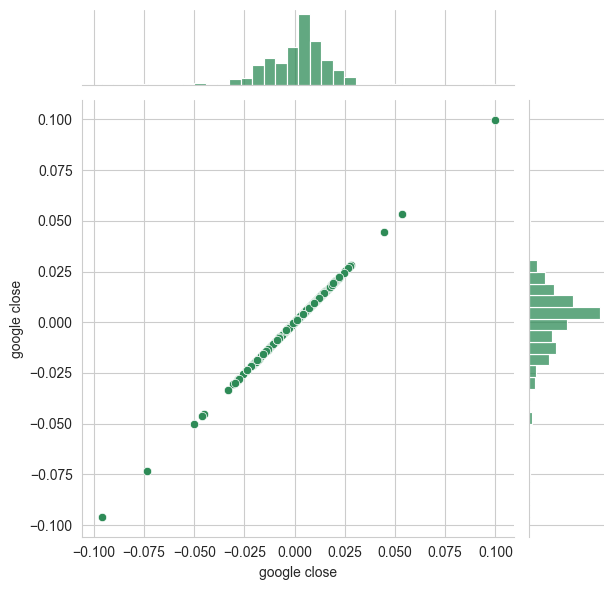

In [62]:
sns.jointplot(tech_returns,x = 'google close',y= 'google close',kind='scatter',color='seagreen')
plt.show()

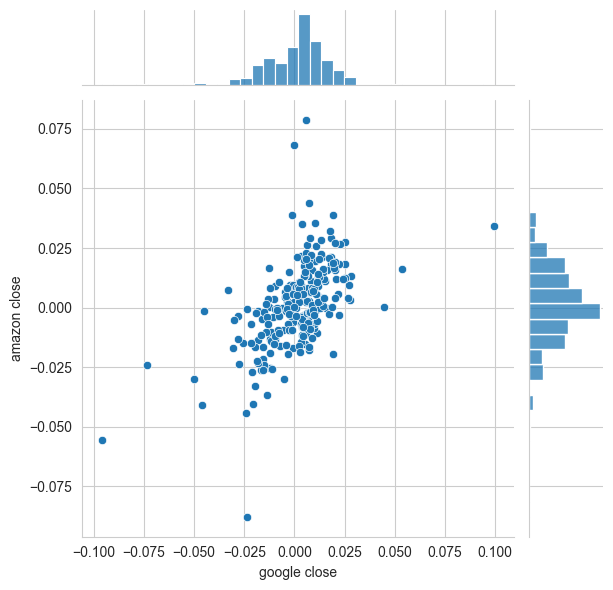

In [63]:
sns.jointplot(tech_returns,x = 'google close',y= 'amazon close',kind='scatter')

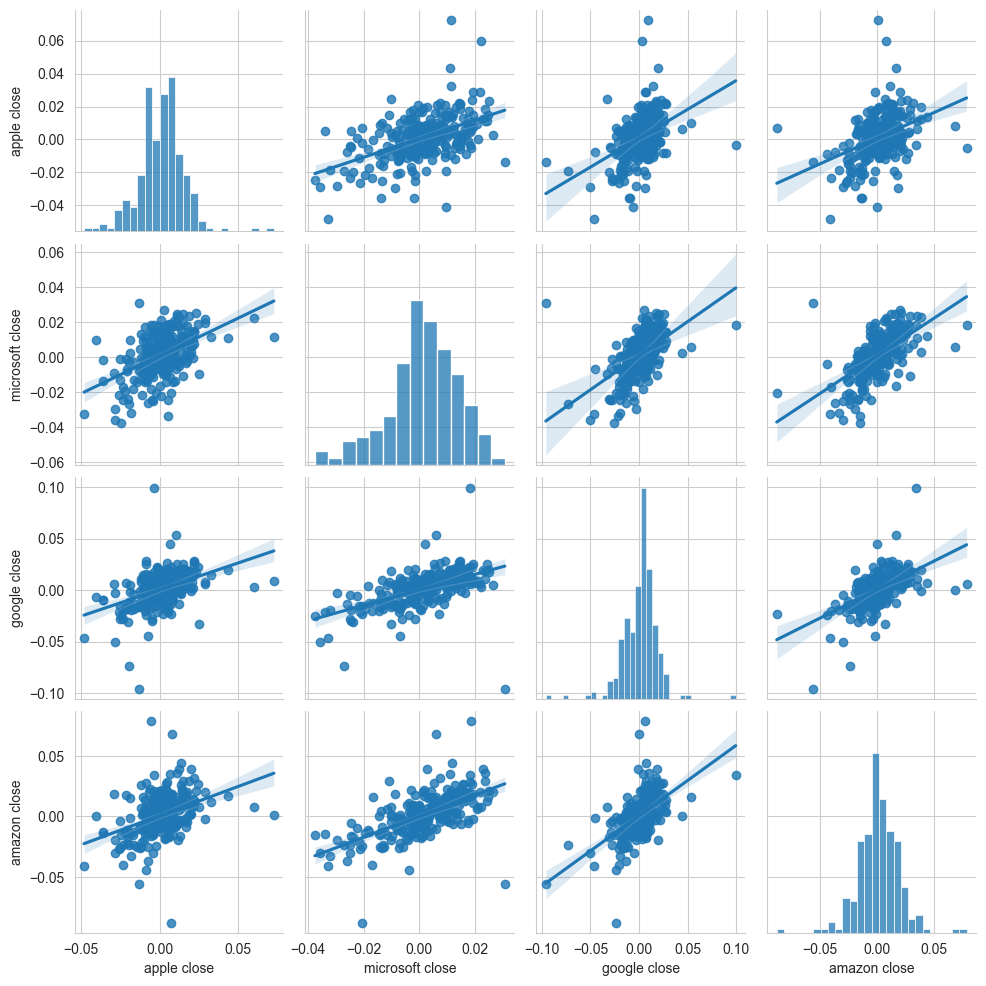

In [64]:
sns.pairplot(tech_returns,kind='reg')


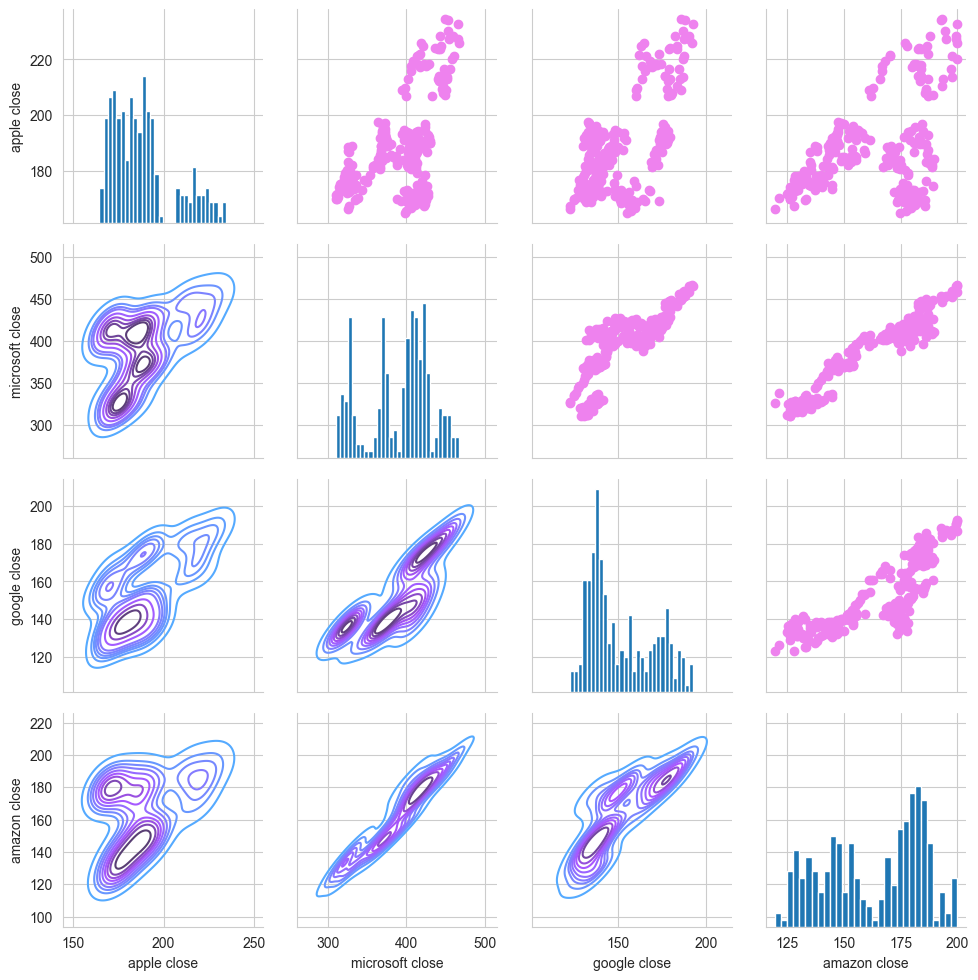

In [65]:
returns_fig = sns.PairGrid(clossing_df)
returns_fig.map_upper(plt.scatter,color='violet')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)
plt.show()

In [66]:
rets=tech_returns.dropna()
tech_returns.isnull().sum()

apple close        1
microsoft close    1
google close       1
amazon close       1
dtype: int64

<Axes: >

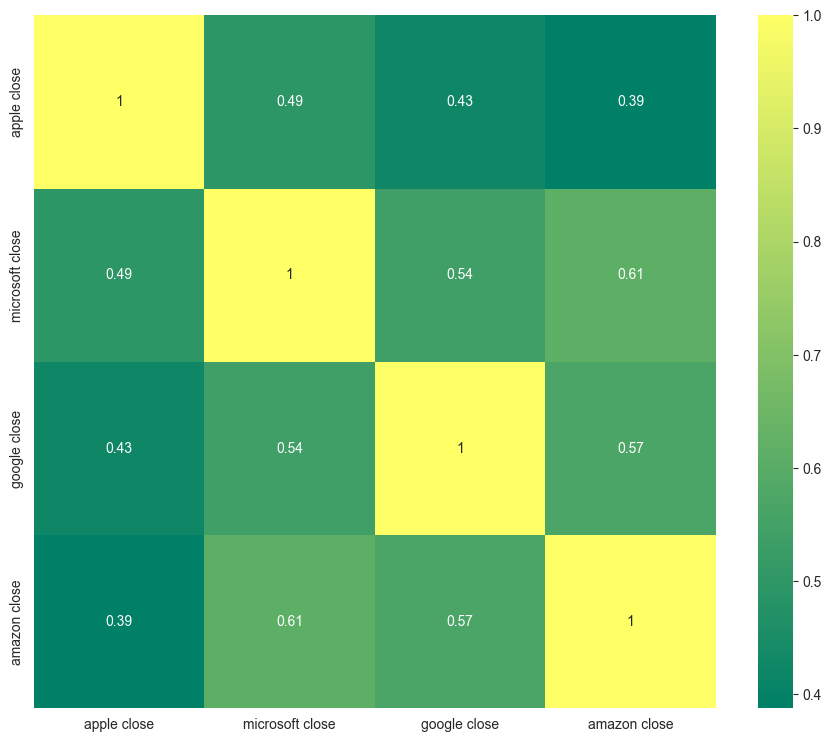

In [67]:
corr = rets.corr()
plt.figure(figsize=(11,9))
sns.heatmap(corr,annot=True,cmap='summer')

Risk analysis


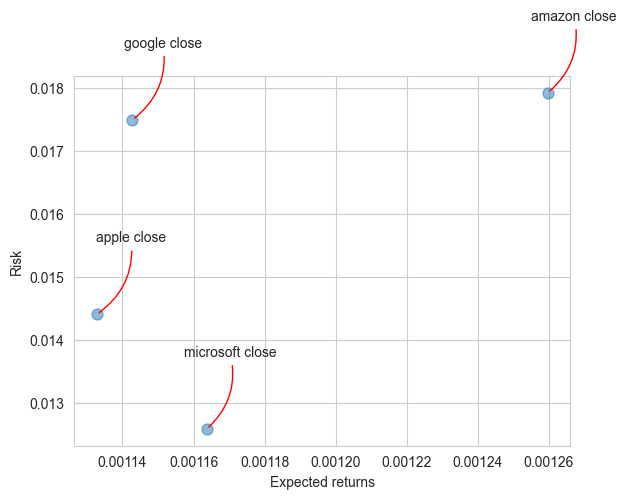

In [68]:

area= np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha ='right',va='bottom',arrowprops=dict(arrowstyle='-',color='red',connectionstyle='arc3,rad=-0.3'))

Value at risk

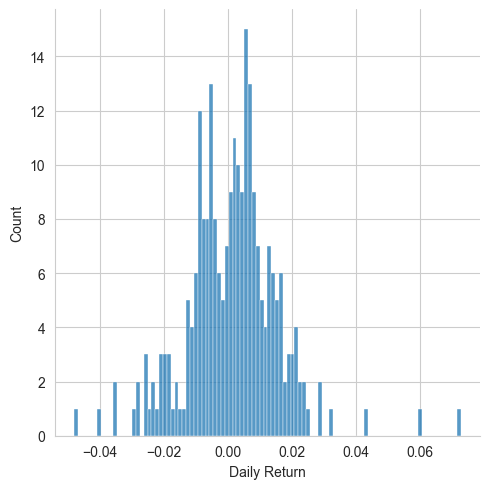

In [69]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100)
plt.show()

In [70]:
rets.head(99999999999999999999)

,apple close,microsoft close,google close,amazon close
Date,,,,
2023-08-22,0.007905,0.001802,0.005895,-0.003193
2023-08-23,0.021949,0.014079,0.027142,0.009460
2023-08-24,-0.026170,-0.021498,-0.020944,-0.027155
2023-08-25,0.012643,0.009407,0.002070,0.010771
2023-08-28,0.008846,0.002229,0.008417,-0.000900
...,...,...,...,...
2024-08-12,0.007130,0.001946,-0.008707,-0.000839
2024-08-13,0.017193,0.017699,0.012077,0.020564
2024-08-14,0.002034,0.006884,-0.023504,-0.000764


In [71]:
emp = rets['apple close'].quantile(0.05)
print('The 0.05 empirical quantile of daily returns is at',emp)

The 0.05 empirical quantile of daily returns is at -0.022677917595027308


## Prediction

The prediction part is about predicting the stock's closing value in the upcoming days or months too.

We will predict only using the closing values of the company and will not use another feature. We will be Using LSTM model.

### Strategy

DATA we use :
    scaled data(dataset after minmax-scaling), dataset 
we use scaled data in x_train , y_train and x_test and 

we will predict the scaled version of y_test(pred) and use inverse scaler to remove scaling, then we will compare those predictions with y_test (true values) .

SPLIT:

let x be 95% of data set (we split train test in 95:05 ratio)
x_train -> 0 to x of scaled data
y_train -> 0 to x of scaled data 
x_ test -> x to : of scaled data
y_test -> x to : of dataset

Train and test data:

as we are use a single  numpy array , we use data of last 60 days to predict today. 
so (today-60 days to yesterday) data to predict today value.

In [72]:
df=yf.download('AAPL',start='2012-01-01',end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607712,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400


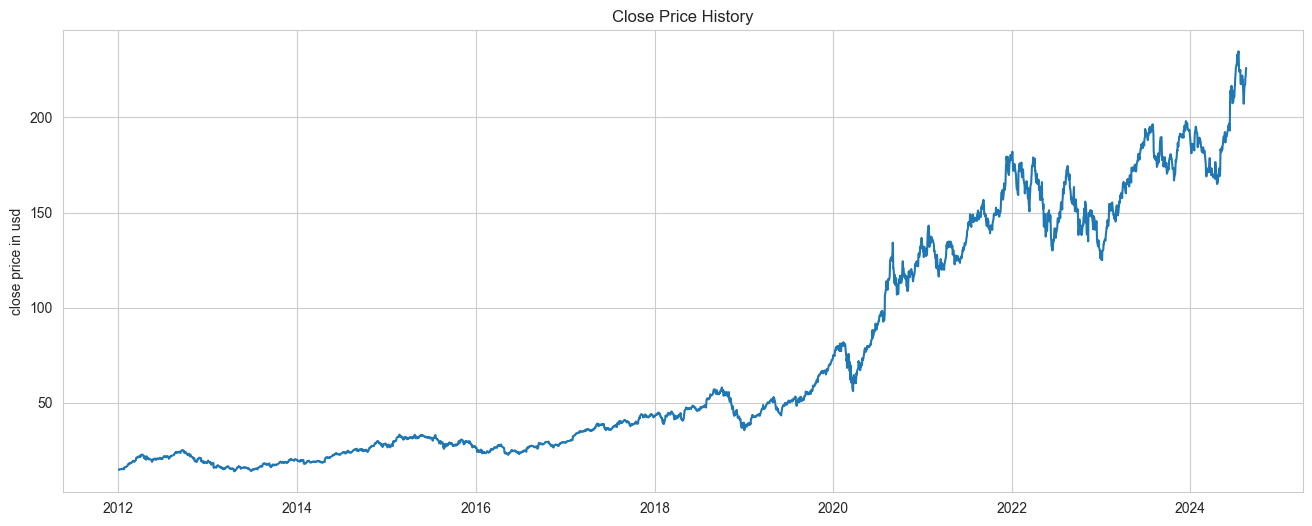

In [73]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.ylabel('close price in usd')
plt.show()

In [74]:
data = df.filter(['Close'])
# turn them to numpy
dataset = data.values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.94068974],
       [0.95427223],
       [0.96029382]])

In [75]:
x= int(np.ceil(len(dataset)*0.95))
x

3018

In [76]:
trained_data = scaled_data[0:int(x),:]
x_train=[]
y_train=[]

In [77]:
for i in range(60,x):
    x_train.append(trained_data[i-60:i,0])
    y_train.append(trained_data[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

trained_data[i-60:i,0] meaning : trained data array from i-60 days to i in index 0, i.e it will contain 59(values at/in range i-60 to i) values and using them it will predict the value at i.

59 values in train data set --> maps to 1 value at test data set 

#### Creating Model

In [78]:
import tensorflow as tf
from tensorflow.keras import models

In [79]:
from keras.models import Sequential

In [80]:
from keras.layers import Dense, LSTM

In [81]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\cheru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.fit(x_train,y_train)

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0089


#### predictions

In [83]:
test_data = scaled_data[x-60:,:]
x_test = []
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
y_test=dataset[x:,:]

x_test = np.array(x_test)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(((predictions-y_test)**2)))
rsme

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


9.988049637735367

C:\Users\cheru\AppData\Local\Temp\ipykernel_14916\4266018834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


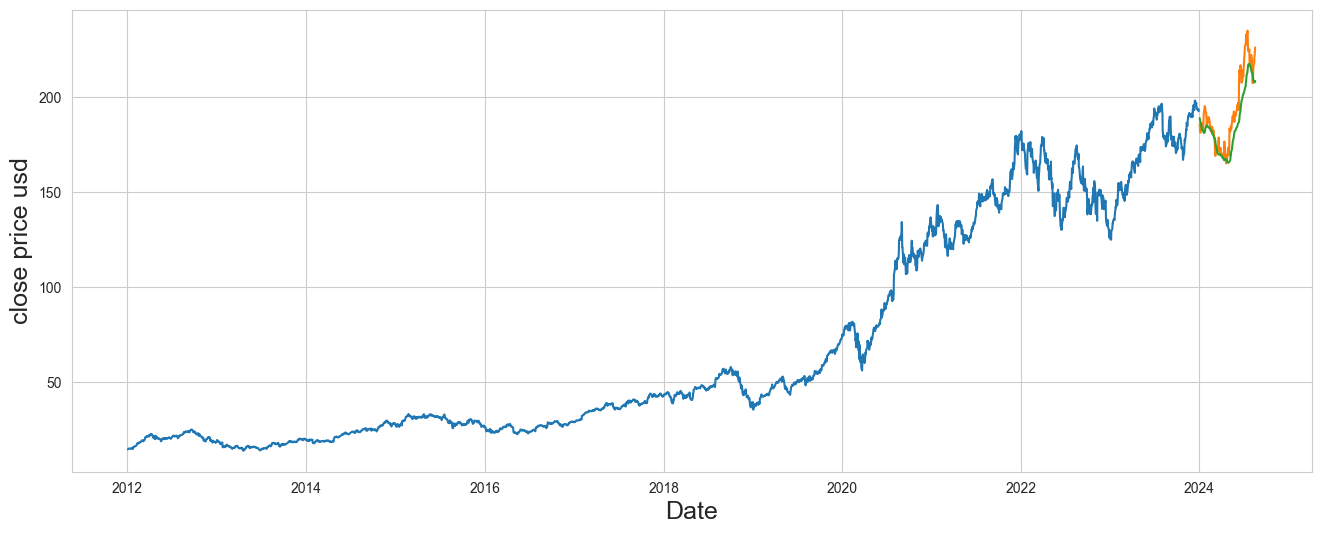

In [84]:
train = data[:x]
valid = data[x:]
valid['predictions'] = predictions

plt.figure(figsize=(16,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price usd',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.show()

zooming in to 2024 (only valid and predictions) 

C:\Users\cheru\AppData\Local\Temp\ipykernel_14916\2709573519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


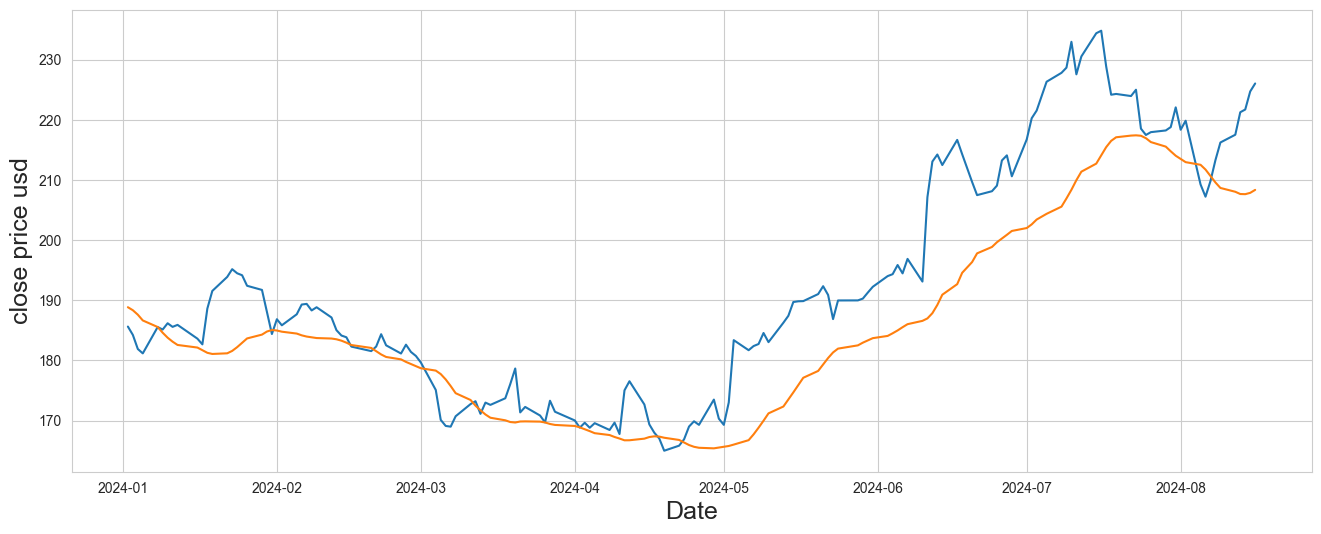

In [85]:
train = data[:x]
valid = data[x:]
valid['predictions'] = predictions

plt.figure(figsize=(16,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price usd',fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.show()